In [1]:
import sys
sys.path.insert(0, "/home/broerman/crispy_shifty/")
from crispy_shifty.utils.io import gen_array_tasks

design_list_file = "/home/broerman/crispy_shifty/projects/DAB/round_1/design/02_mpnn_structure/mpnn_inpaints.pair"

simulation_name = "03_fold_complex"
output_path = f"/home/broerman/crispy_shifty/projects/DAB/round_1/design/{simulation_name}"

options = " ".join(
    [
        "out:level 100",
    ]
)
extra_kwargs = {"models": "1", "use_filter": "false", "use_initial_guess": "true"}

gen_array_tasks(
    distribute_func="crispy_shifty.protocols.folding.fold_bound_state",
    design_list_file=design_list_file,
    output_path=output_path,
    nstruct=1,
    nstruct_per_task=1,
    options=options,
    extra_kwargs=extra_kwargs,
    simulation_name=simulation_name,
    sha1=None,
    queue="gpu",
    time="01:00:00",
    gres="--gres=gpu:a4000:1"
)

Run the following command with your desired environment active:
sbatch -a 1-180 /home/broerman/crispy_shifty/projects/DAB/round_1/design/03_fold_complex/run.sh


In [1]:
import os
import sys
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.io import collect_score_file

simulation_name = "03_fold_complex"
output_path = f"/home/broerman/crispy_shifty/projects/DAB/round_1/design/{simulation_name}"

if not os.path.exists(os.path.join(output_path, "scores.json")):
    collect_score_file(output_path, "scores")

In [2]:
from crispy_shifty.utils.io import parse_scorefile_linear

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df = parse_scorefile_linear(os.path.join(output_path, "scores.json"))

  0%|          | 0/1620 [00:00<?, ?it/s]

In [3]:
import numpy as np
scores_df["designed_by"] = np.where(scores_df["designed_by"] == "mpnn", "mpnn", "inpainting")

In [4]:
import pandas as pd

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df.to_csv(os.path.join(output_path, "scores.csv"))

scores_df = pd.read_csv(os.path.join(output_path, "scores.csv"), index_col=0)

5it [00:00, 13.28it/s]


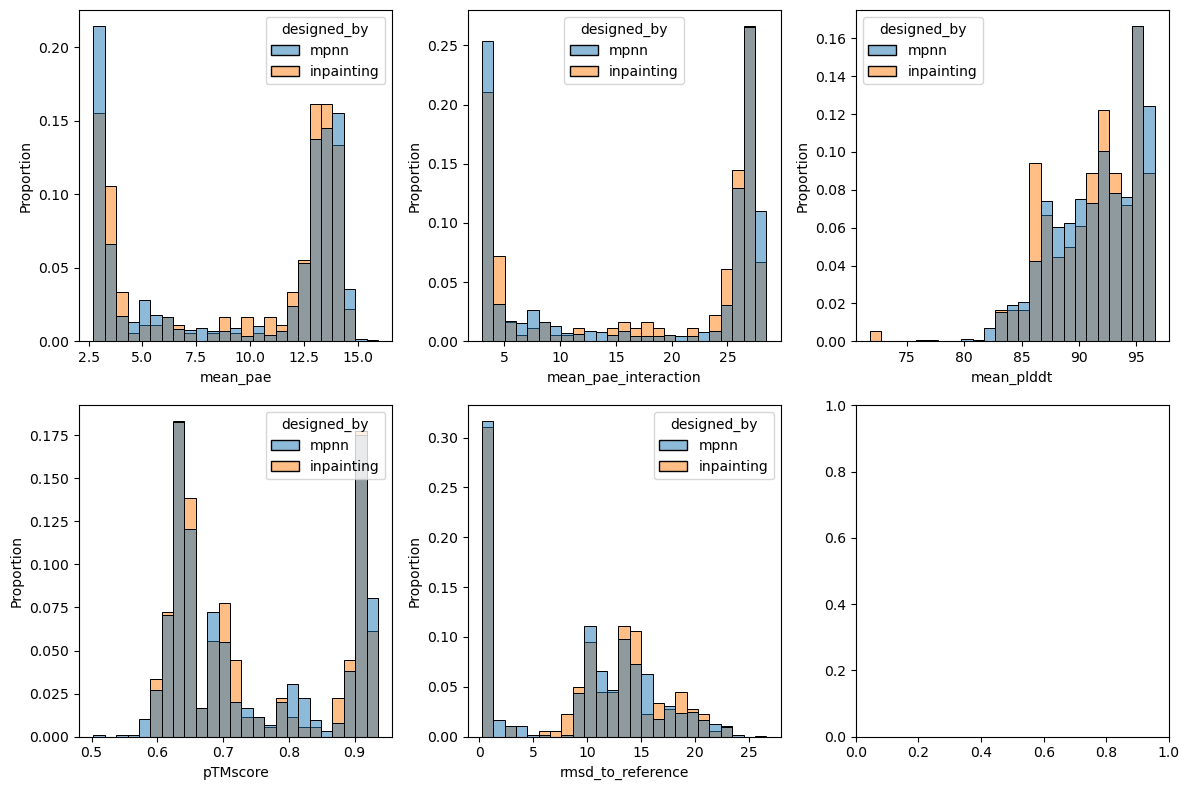

In [6]:
import matplotlib.pyplot as plt
from crispy_shifty.utils.plotting import histplot_df, pairplot_df

cols = [
    "mean_pae",
    "mean_pae_interaction",
    "mean_plddt",
    "pTMscore",
    "rmsd_to_reference",
]
the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=25,
    hue="designed_by",
    stat="proportion",
    common_norm=False,
)
plt.savefig(os.path.join(output_path, "af2_scores_all.png"))

In [14]:
filtered_df = scores_df.query("rmsd_to_reference < 3")

In [17]:
filtered_df.parent.value_counts().sort_index()

JHB_07ABr2          1
cs_203r2           56
cs_207_left        12
cs_207_right1      84
cs_207_right2      81
cs_221             21
cs_230_straight     6
cs_242             45
cs_243             22
cs_244_twist        3
cs_245              1
cs_269_straight    85
cs_269_twist       60
cs_287              1
cs_292             71
Name: parent, dtype: int64

5it [00:00, 22.27it/s]


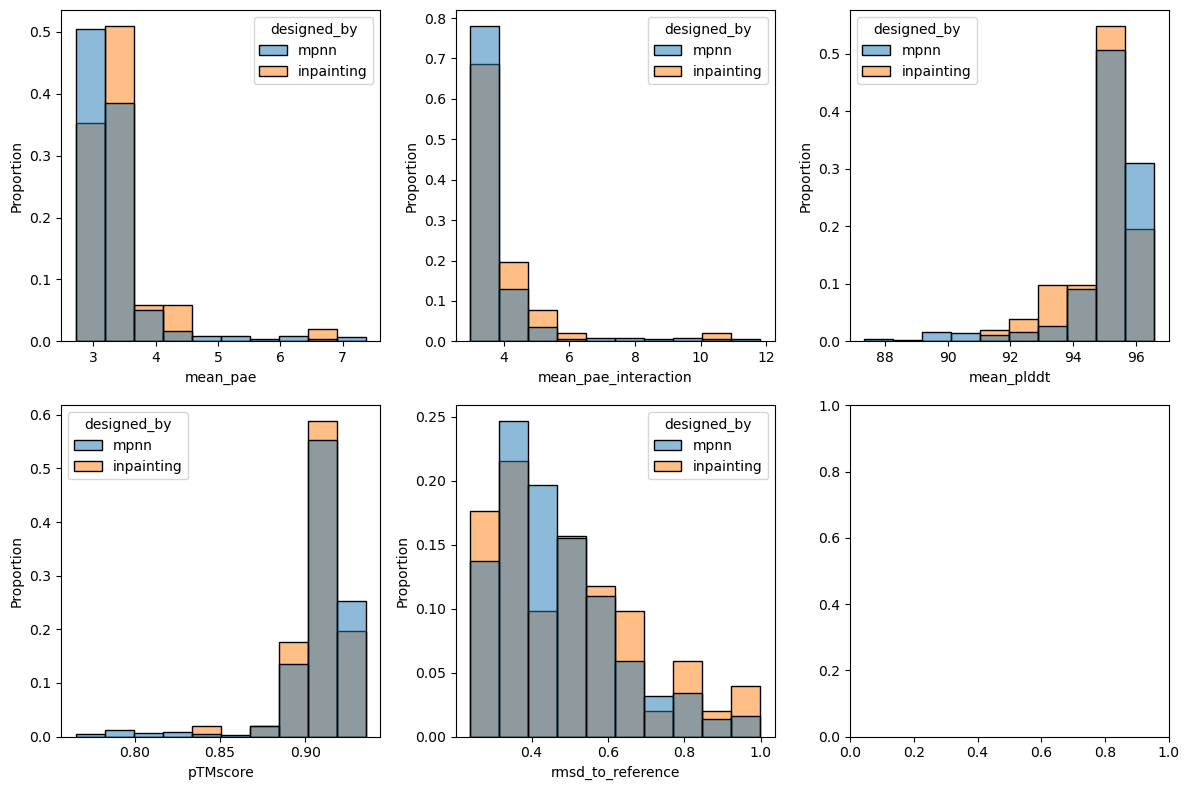

In [8]:
the_fig = histplot_df(
    df=filtered_df,
    cols=cols,
    bins=10,
    hue="designed_by",
    stat="proportion",
    common_norm=False,
)
plt.savefig(os.path.join(output_path, "af2_scores.png"))

In [9]:
filtered_df = scores_df.query("mean_pae < 5.5 and mean_pae_interaction < 7 and mean_plddt > 93 and pTMscore > 0.86 and rmsd_to_reference < 1")
filtered_df = filtered_df.sort_values("total_length")
len(filtered_df)

457

In [10]:
filtered_df.parent.value_counts()

cs_207_right1      84
cs_207_right2      80
cs_269_straight    73
cs_269_twist       60
cs_292             51
cs_203r2           50
cs_221             20
cs_243             18
cs_207_left        10
cs_230_straight     6
cs_244_twist        3
cs_245              1
cs_287              1
Name: parent, dtype: int64

In [ ]:
with open(os.path.join(output_path, "folded_structures.list"), "w") as f:
    for path in filtered_df.index:
        print(path, file=f)